### Concrete Slump Test

#### Preprocessing Data

In [7]:
#import module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

Firstly, inspect the data and perform data cleaning if needed. There are 7 input variables (i.e., feature columns) and 3 output variables. Our interest is the 28-day Compressive Strength output, so the other two output variables should be dropped. Perform some basic visualisation and determine whether any additional features should be removed. 

In [3]:
#load the data
df_slump = pd.read_csv('datasets/slump_test.data')

In [4]:
df_slump

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
...,...,...,...,...,...,...,...,...,...,...,...
98,99,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97
99,100,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0,20.0,50.23
100,101,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0,50.50
101,102,297.1,40.9,239.9,194.0,7.5,908.9,651.8,27.5,67.0,49.17


In [5]:
#drop unnecessary columns
to_drop_slump = ['No','SLUMP(cm)','FLOW(cm)']
df_slump.drop(to_drop_slump, axis=1, inplace=True)

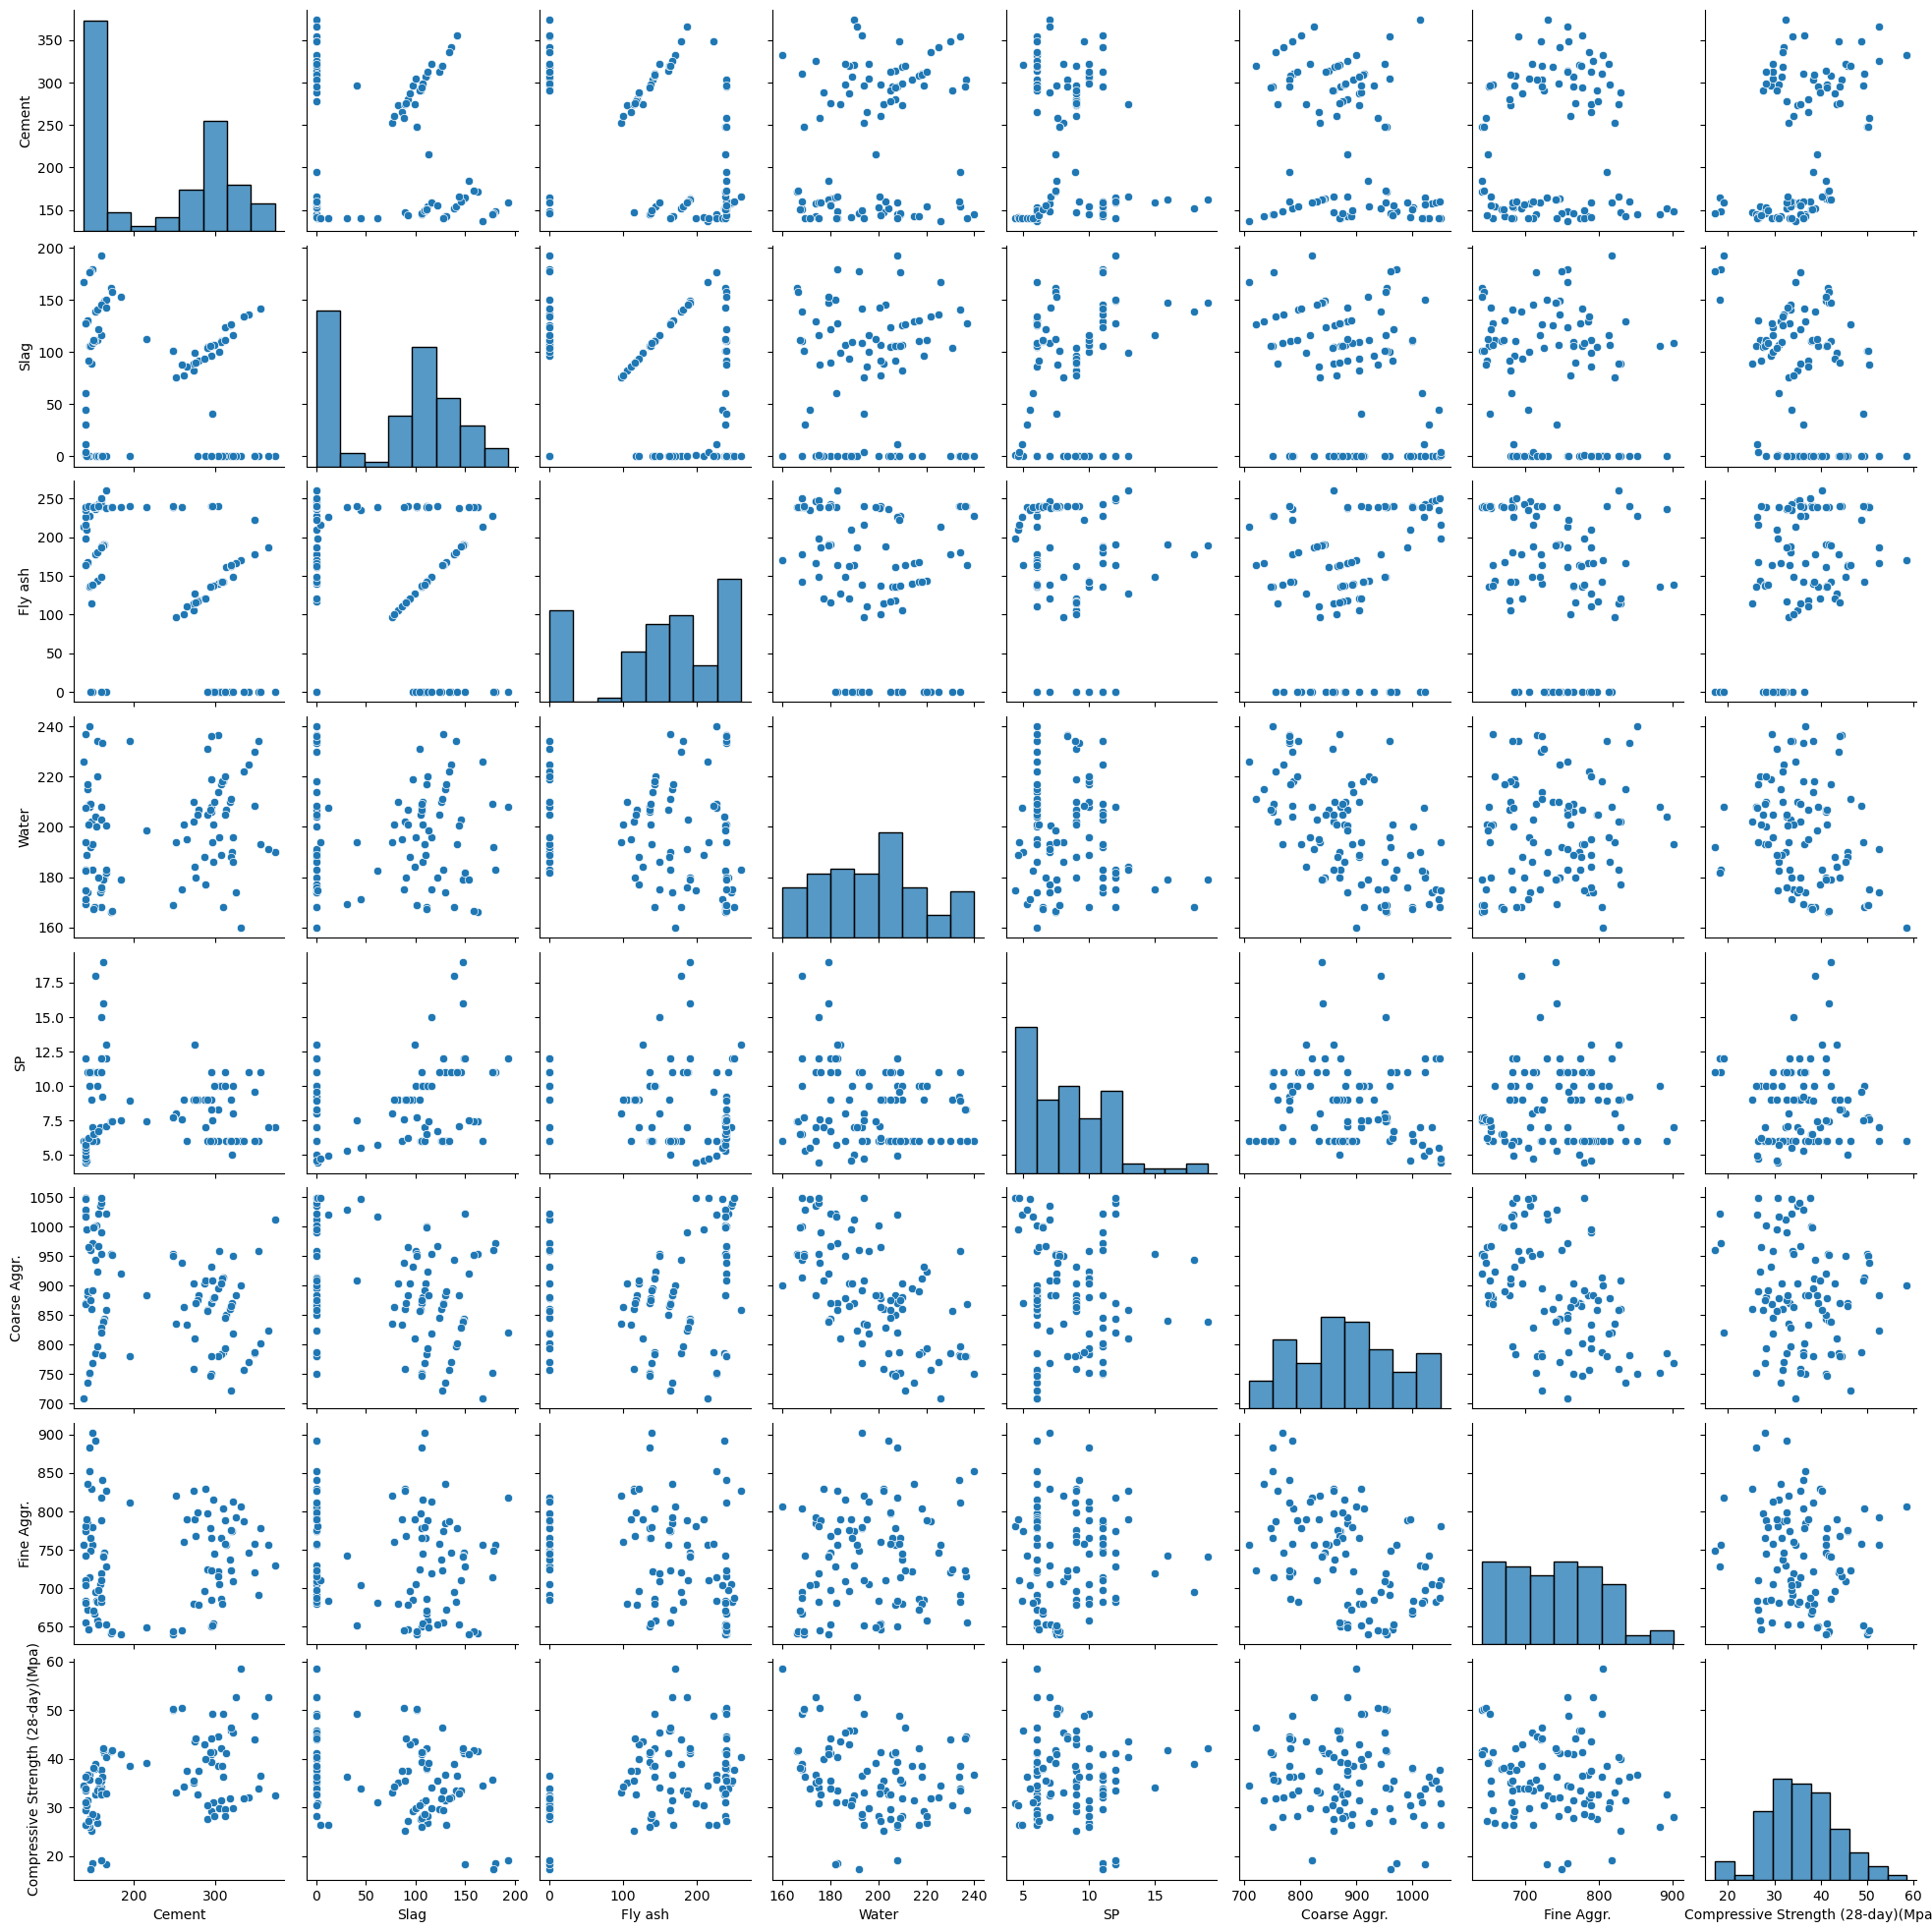

In [8]:
#Plot the pair plot to see the relationship between data
sn.pairplot(df_slump)

<Axes: >

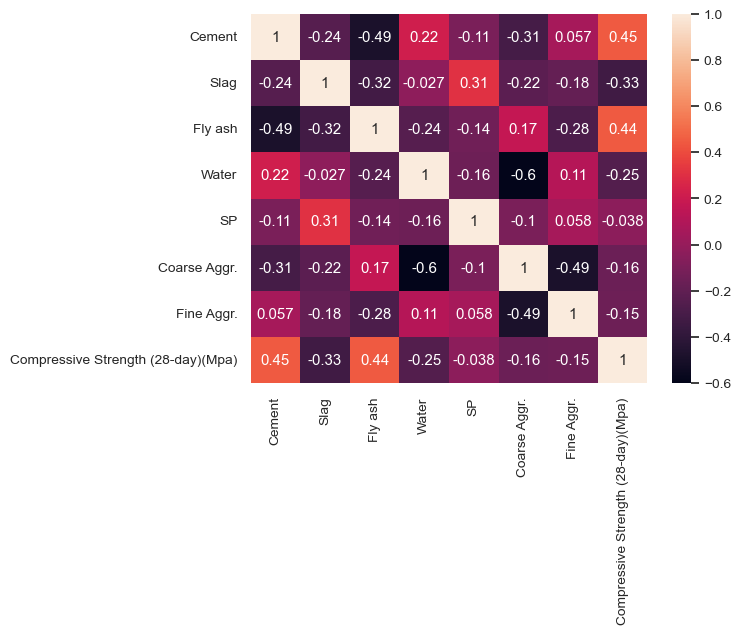

In [9]:
#Calculate the correlation between variable
corr_slump = df_slump.corr()

# Create a correlation matrix plot
#plt.figure(figsize=(30,20))

sn.set(font_scale=0.9)
sn.heatmap(corr_slump, annot=True)

In [10]:
#Checking the NAN value of the data 
Nan_rows= df_slump[df_slump.isnull().any(axis=1)]
Nan_rows.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,Compressive Strength (28-day)(Mpa)


We first drop three columns that will not be used in the model: NO, Slump(cm), and Flow(cm). Then, we plot the pair plot of the variables and its correlation matrix to see if a variable has a high correlation, which indicates multicollinearity, and if we should drop the variable. However, the plot shows that no variable has a very high correlation with each other; only 'Coarse Aggr.' vs 'Water' has a medium-high correlation, which is -0.6. The scatter plot also shows that those variables have a negative linear pattern but are not strong. So, we will include all of the variables in the model. Last, we check if there is any NaN value that may cause error while fitting the model.

The we perform a 80/20 random split on the dataset to form a training set and a test set. For Voting regressor, we use the following as the 3 base estimators with default hyperparameters: (i) a linear SVM regressor, (ii) a linear regressor (using the LinearRegression class), and (iii) a Stochastic Gradient Descent regressor.

In [11]:
#Split the data into x and y
y_slump = df_slump.iloc[:,7]
x_slump = df_slump.iloc[:,0:7]

In [13]:
#Importing the module
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#scalling the value for all features
scaler2 = MinMaxScaler()
x_slump_scaled = scaler2.fit_transform(x_slump)

#splitting the data into train and test data
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_slump_scaled, y_slump, test_size=0.2, random_state=42)

In [14]:
#Three diverse models
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error

In [15]:
# Create the three base estimators
svm = LinearSVR()
lr = LinearRegression()
sgd = SGDRegressor()
estimators=[('svm',svm ), ('lr',LinearRegression() ), ('sgd', sgd)]

voting_reg = VotingRegressor(estimators)

We then train the base estimators and the Voting regressor on the training set and compare their predicted 28-day Compressive Strength values for the test set.

In [16]:
# Train the base estimators and voting regressor on the training set
svm.fit(X_train2, y_train2)
lr.fit(X_train2, y_train2)
sgd.fit(X_train2, y_train2)

voting_reg.fit(X_train2, y_train2)

# Make predictions on the test set using the base estimators and the voting regressor
svm_preds = svm.predict(X_test2)
lr_preds = lr.predict(X_test2)
sgd_preds = sgd.predict(X_test2)
voting_preds = voting_reg.predict(X_test2)

In [17]:
# Calculate the RMSEs of the predictions
svm_rmse = mean_squared_error(y_test2, svm_preds, squared=False)
lr_rmse = mean_squared_error(y_test2, lr_preds, squared=False)
sgd_rmse = mean_squared_error(y_test2, sgd_preds, squared=False)
voting_rmse = mean_squared_error(y_test2, voting_preds, squared=False)

# Print the RMSEs
print('Linear SVM RMSE:', svm_rmse)
print('Linear Regression RMSE:', lr_rmse)
print('Stochastic Gradient Descent RMSE:', sgd_rmse)
print('Voting Regressor RMSE:', voting_rmse)

Linear SVM RMSE: 4.708801514626405
Linear Regression RMSE: 2.068522874433819
Stochastic Gradient Descent RMSE: 2.168681509262595
Voting Regressor RMSE: 2.685514646115206


Based on the root mean squared error (RMSE) values, it looks like the linear regression and stochastic gradient descent (SGD) regressors are performing better than the linear SVM regressor. A voting regressor is an ensemble machine learning model that combines the predictions of multiple individual regressors (called base estimators) to make a final prediction. Therefore, the performance is also the combination from the three models. It explains the voting regressor has an RMSE that is between the linear SVM and linear regression/SGD regressors. This also suggests that for this dataset, the linear SVM regressor may not be the best choice for predicting the 28-day compressive strength, and that the linear regression and SGD regressors may be better choices. 

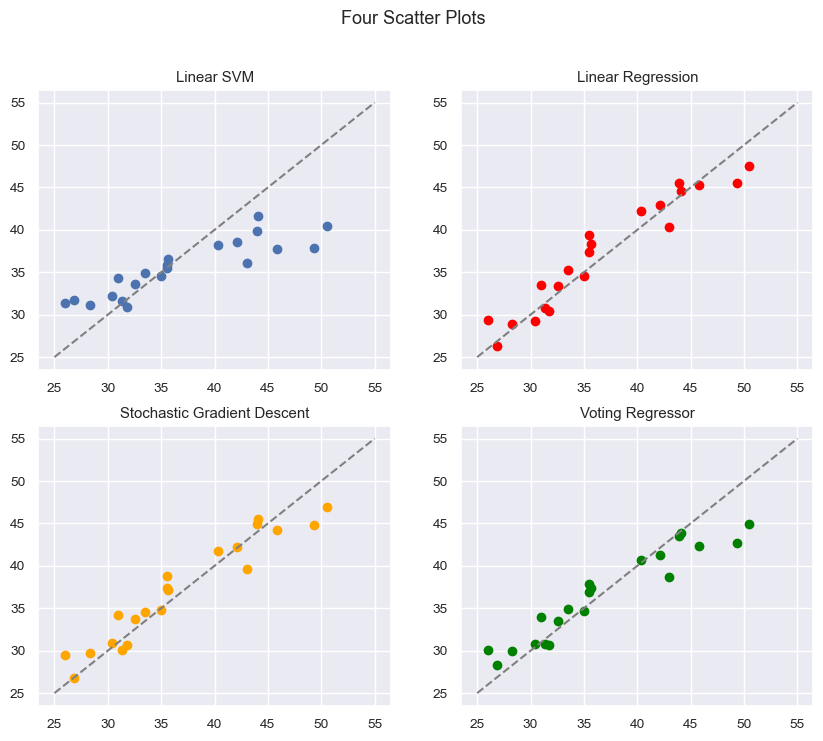

In [18]:
# Create a figure with 2 rows and 2 columns of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the scatter plot 
axs[0, 0].scatter(y_test2, svm_preds)
axs[0, 0].set_title('Linear SVM')
axs[0, 0].plot([25, 55], [25, 55], '--', color='gray')

axs[0, 1].scatter(y_test2, lr_preds,  color='red')
axs[0, 1].set_title('Linear Regression')
axs[0, 1].plot([25, 55], [25, 55], '--', color='gray')

axs[1, 0].scatter(y_test2, sgd_preds,  color='orange')
axs[1, 0].set_title('Stochastic Gradient Descent')
axs[1, 0].plot([25, 55], [25, 55], '--', color='gray')

axs[1, 1].scatter(y_test2, voting_preds,  color='green')
axs[1, 1].set_title('Voting Regressor')
axs[1, 1].plot([25, 55], [25, 55], '--', color='gray')

fig.suptitle('Four Scatter Plots')

plt.show()

Those plots show the scatter plot between the predicted values and test data. It is linear that the Regressor with a low score of error shows a positive linear relationship in the data, which means that most of the prediction value is the same as the ground truth value, with the three Regressor (SGD, Linear Regression, Voting regressor) have good scatters around the diagonal line. In contrast, linear svm has a slight difference in the direction of the data.

Individually tune a few hyperparameters for each of these base estimators. You can use 3-fold cross-validation with Grid-Search to select the best hyperparameters. Then, repeat the previous task with the selected set of hyperparameters for each base estimator. Compare and comment on the results.

In [19]:
from sklearn.model_selection import GridSearchCV

# define the hyperparameters to tune for each estimator
svm_params = {'C': [0.1, 1, 10], 
            'epsilon': [0.1, 0.01, 0.001], 
            'max_iter': [1000, 5000, 10000]}
lr_params = {'fit_intercept': [True, False],
          'copy_X': [True, False]}
sgd_params = {'alpha': [0.0001, 0.001, 0.01],
            'max_iter': [1000, 2000, 3000],
            'tol': [1e-3, 1e-4, 1e-5],
            'loss': ['squared_loss', 'huber', 'epsilon_insensitive'], 
            'penalty': ['l1', 'l2', 'elasticnet']}

# create a dictionary of the hyperparameters for each estimator
params = {'svm': svm_params, 'lr': lr_params, 'sgd': sgd_params}

# perform Grid-Search with 3-fold cross-validation for each estimator
for name, estimator in estimators:
    grid_search = GridSearchCV(estimator, params[name], cv=3)
    grid_search.fit(X_train2, y_train2)
    print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
    

Best hyperparameters for svm: {'C': 10, 'epsilon': 0.1, 'max_iter': 10000}
Best hyperparameters for lr: {'copy_X': True, 'fit_intercept': True}
Best hyperparameters for sgd: {'alpha': 0.0001, 'loss': 'epsilon_insensitive', 'max_iter': 3000, 'penalty': 'l1', 'tol': 1e-05}


In [20]:
# Create the three base estimators with the best hyperparameter
svm = LinearSVR(C= 10, epsilon = 0.1, max_iter= 5000)
lr = LinearRegression(copy_X = True, fit_intercept= True)
sgd = SGDRegressor(alpha = 0.0001, loss = 'epsilon_insensitive', max_iter = 3000, penalty = 'l1', tol = 1e-05)
estimators=[('svm',svm ), ('lr',LinearRegression() ), ('sgd', sgd)]

voting_reg = VotingRegressor(estimators)

# Train the base estimators and voting regressor on the training set
svm.fit(X_train2, y_train2)
lr.fit(X_train2, y_train2)
sgd.fit(X_train2, y_train2)

voting_reg.fit(X_train2, y_train2)

# Make predictions on the test set using the base estimators and the voting regressor
svm_preds = svm.predict(X_test2)
lr_preds = lr.predict(X_test2)
sgd_preds = sgd.predict(X_test2)
voting_preds = voting_reg.predict(X_test2)

# Calculate the RMSEs of the predictions
svm_rmse = mean_squared_error(y_test2, svm_preds, squared=False)
lr_rmse = mean_squared_error(y_test2, lr_preds, squared=False)
sgd_rmse = mean_squared_error(y_test2, sgd_preds, squared=False)
voting_rmse = mean_squared_error(y_test2, voting_preds, squared=False)

# Print the RMSEs
print('Linear SVM RMSE:', svm_rmse)
print('Linear Regression RMSE:', lr_rmse)
print('Stochastic Gradient Descent RMSE:', sgd_rmse)
print('Voting Regressor RMSE:', voting_rmse)

Linear SVM RMSE: 2.4187566825632265
Linear Regression RMSE: 2.068522874433819
Stochastic Gradient Descent RMSE: 3.1821098802351515
Voting Regressor RMSE: 2.428015064153252


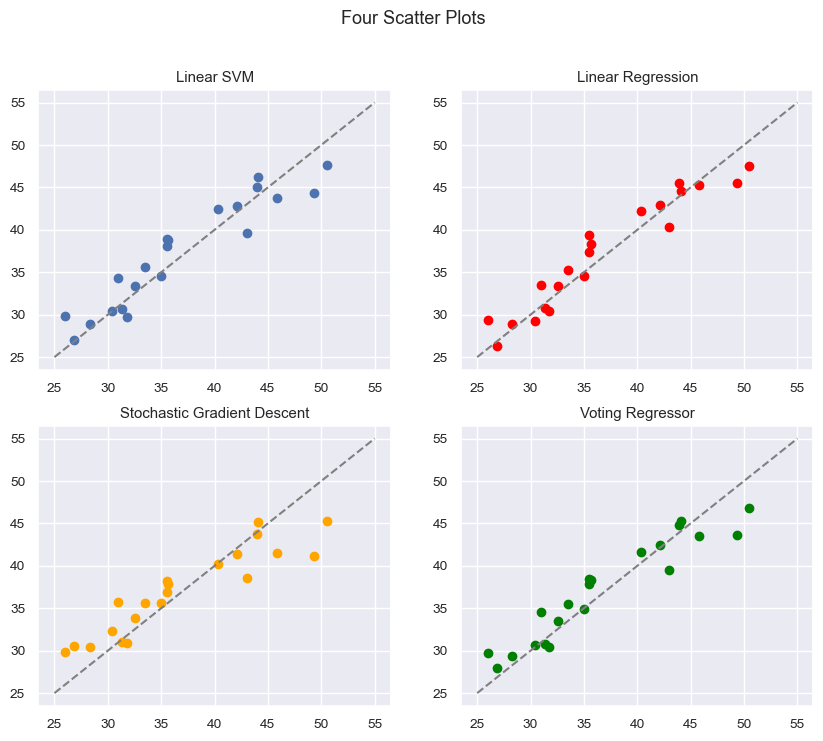

In [21]:
# Create a figure with 2 rows and 2 columns of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the scatter plot 
axs[0, 0].scatter(y_test2, svm_preds)
axs[0, 0].set_title('Linear SVM')
axs[0, 0].plot([25, 55], [25, 55], '--', color='gray')

axs[0, 1].scatter(y_test2, lr_preds,  color='red')
axs[0, 1].set_title('Linear Regression')
axs[0, 1].plot([25, 55], [25, 55], '--', color='gray')

axs[1, 0].scatter(y_test2, sgd_preds,  color='orange')
axs[1, 0].set_title('Stochastic Gradient Descent')
axs[1, 0].plot([25, 55], [25, 55], '--', color='gray')

axs[1, 1].scatter(y_test2, voting_preds,  color='green')
axs[1, 1].set_title('Voting Regressor')
axs[1, 1].plot([25, 55], [25, 55], '--', color='gray')

fig.suptitle('Four Scatter Plots')

plt.show()

We enhanced the model's performance by fine-tuning the hyperparameters using grid search. An improvement was made in the SVM model's RMSE, which went from 4.7081 to 2.4087. Meanwhile, for SGD the error is increasing from 2.16 to 3.18, means that the tuning parameter may not be the best parameter compared to the deafult parameter set for SGD. The scatter plot is also showing strong positive relationship for the prediction values vs ground truth for all models. However, the voting regressor's performance, with an RMSE of 2.4291, could have improved more. This may be due to the base estimators in the voting regressor, that one (SVM regressor) perform better, while the other one (SGD) has a slight drop performance. 